In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

In [14]:
# imdb_title_basics cleaning
imdb_title_basics = pd.read_csv('./data/imdb.title.basics.csv')
imdb_title_basics.drop(columns = {'runtime_minutes'}, inplace = True)
imdb_title_basics = imdb_title_basics.loc[imdb_title_basics.genres.isna() == False] # This line removes rows where genre is missing
imdb_title_basics.rename({'tconst': 'movie_id'}, axis = 1, inplace=True)

In [15]:
# column cleaner function
def clean_columns(series):
    return series.apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [16]:
tn_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv')
tn_movie_budgets = tn_movie_budgets.drop(columns={'id'})
tn_movie_budgets.rename({'movie': 'primary_title'}, axis = 1, inplace=True)

### cleaning columns of $ and , and makes them floats
tn_movie_budgets.production_budget = clean_columns(tn_movie_budgets.production_budget)
tn_movie_budgets.domestic_gross = clean_columns(tn_movie_budgets.domestic_gross)
tn_movie_budgets.worldwide_gross = clean_columns(tn_movie_budgets.worldwide_gross)
###
tn_movie_budgets['budget_gross_ratio'] = tn_movie_budgets.worldwide_gross / tn_movie_budgets.production_budget
tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets.domestic_gross > 0] # Drops rows with missing gross data

In [74]:
merge = tn_movie_budgets.merge(imdb_title_basics, on= 'primary_title')
merge.drop_duplicates(subset='movie_id', keep='first', inplace=True)
merge = merge.drop(merge[merge.primary_title.duplicated()&merge.production_budget.duplicated()].index)
merge

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,movie_id,original_title,start_year,genres
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",6.53,tt1775309,Abatâ,2011,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2.55,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",0.43,tt6565702,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",4.24,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,"Apr 27, 2018",Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",6.83,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3207,"Jan 27, 2017",Emily,"27,000.00","3,547.00","3,547.00",0.13,tt1863224,Emily,2011,Drama
3210,"Jan 14, 2000",The Terrorist,"25,000.00","195,043.00","195,043.00",7.80,tt9248762,The Terrorist,2018,Thriller
3211,"Apr 28, 2006",Clean,"10,000.00","138,711.00","138,711.00",13.87,tt6619196,Clean,2017,"Comedy,Drama,Horror"
3212,"Jul 6, 2001",Cure,"10,000.00","94,596.00","94,596.00",9.46,tt1872026,Cure,2011,Drama


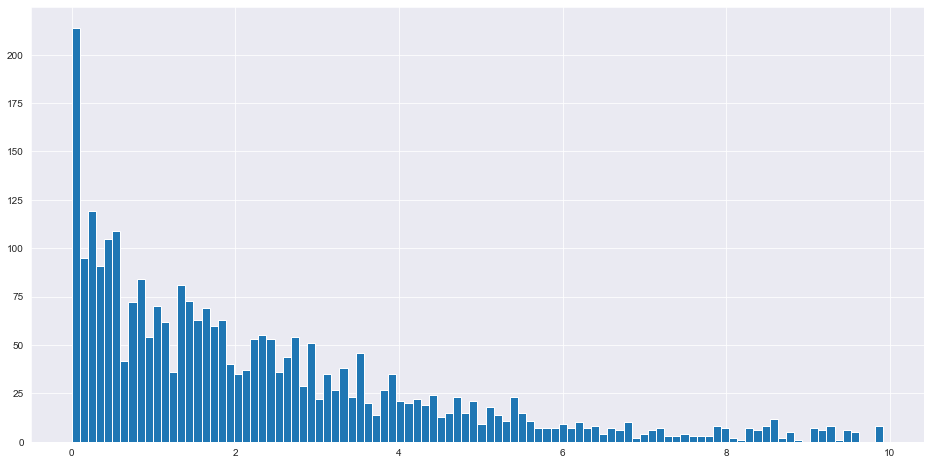

In [63]:
fig, ax = plt.subplots(figsize = (16,8))
# ax.hist(merge1.loc[merge.genres == 'Drama']['worldwide_gross'])
# ax.hist(merge1.loc[merge.genres == 'Documentary']['worldwide_gross'], color = 'r')
# ax.hist(merge1.loc[merge.genres == 'Comedy']['worldwide_gross'], color = 'r', alpha = 0.3)
# ax.hist(merge1.loc[merge.genres == 'Horror,Mystery,Thriller']['worldwide_gross'], color = 'b', alpha = 0.3);
ax.hist(merge1.budget_gross_ratio.loc[merge1.budget_gross_ratio < 10], bins = 100);

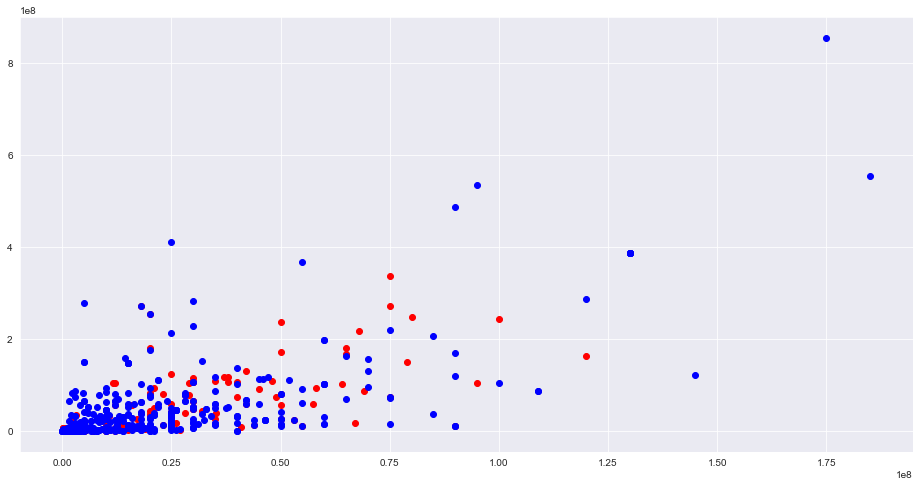

In [64]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(x = merge1.loc[merge1.genres == 'Comedy']['production_budget'],
           y = merge1.loc[merge1.genres == 'Comedy']['worldwide_gross'],
           color = 'r');
ax.scatter(x = merge1.loc[merge1.genres == 'Drama']['production_budget'],
           y = merge1.loc[merge1.genres == 'Drama']['worldwide_gross'],
           color = 'b');

In [65]:
indices = merge1.genres.value_counts()
indices.loc[indices>40] #genres that occur in movies over 40 times

Drama                         397
Documentary                   227
Comedy                        120
Comedy,Drama                   88
Comedy,Drama,Romance           76
Drama,Romance                  72
Horror                         70
Adventure,Animation,Comedy     69
Thriller                       63
Action,Adventure,Sci-Fi        54
Action,Crime,Drama             52
Drama,Thriller                 50
Comedy,Romance                 49
Horror,Thriller                44
Name: genres, dtype: int64

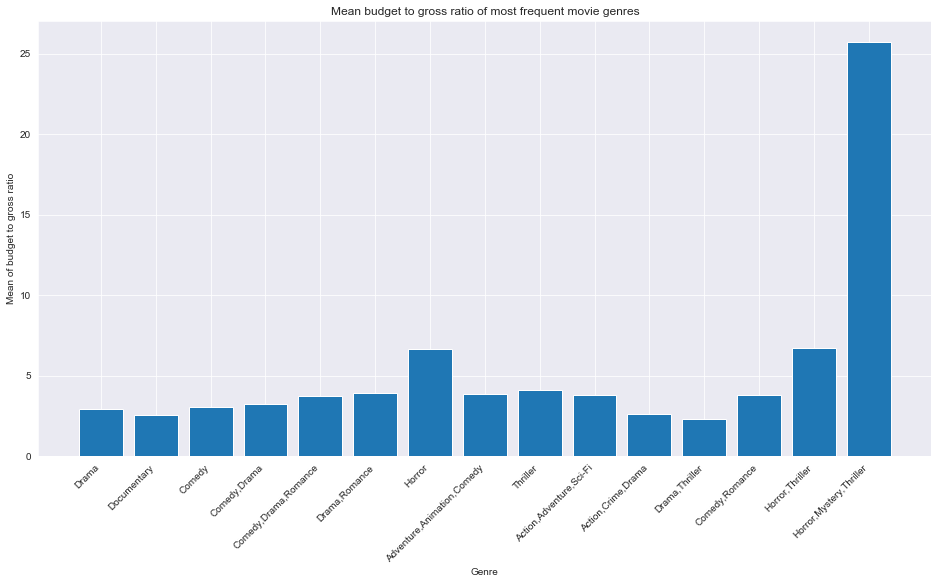

In [66]:
import seaborn as sns
sns.set_style('darkgrid')

bgrmean = merge1.groupby('genres').budget_gross_ratio.mean()
indices = merge1.genres.value_counts()[:15].index

mean_of_top_genres = bgrmean[indices]
fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Mean budget to gross ratio of most frequent movie genres')
ax.set_ylabel('Mean of budget to gross ratio')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, mean_of_top_genres);

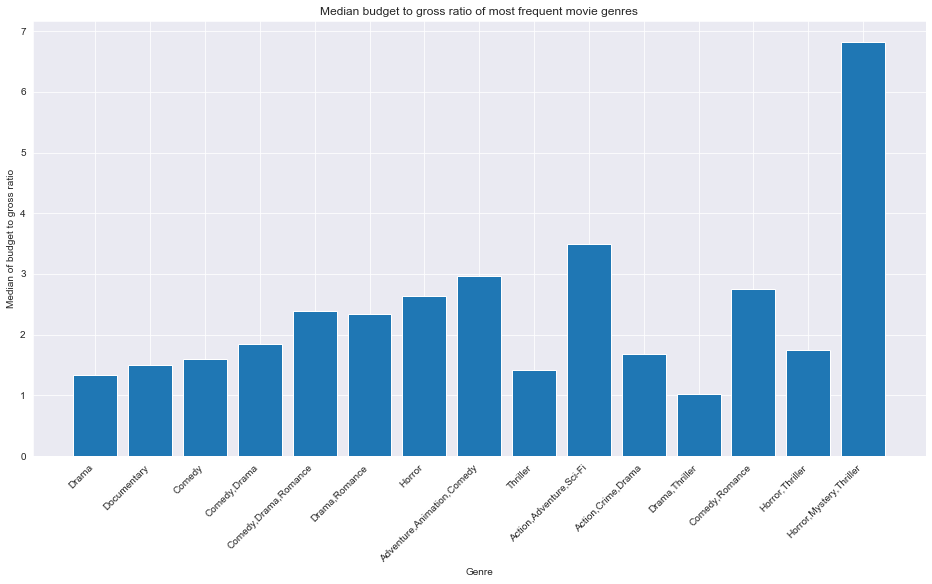

In [67]:
bgrmedian = merge1.groupby('genres').budget_gross_ratio.median()
indices = merge1.genres.value_counts()[:15].index

median_of_top_genres = bgrmedian[indices]
fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Median budget to gross ratio of most frequent movie genres')
ax.set_ylabel('Median of budget to gross ratio')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, median_of_top_genres);

In [ ]:
bgrstd = merge1.groupby('genres').budget_gross_ratio.std()
indices = merge1.genres.value_counts()[:15].index

std_of_top_genres = bgrstd[indices]
fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Median budget to gross ratio of most frequent movie genres')
ax.set_ylabel('Median of budget to gross ratio')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, std_of_top_genres);


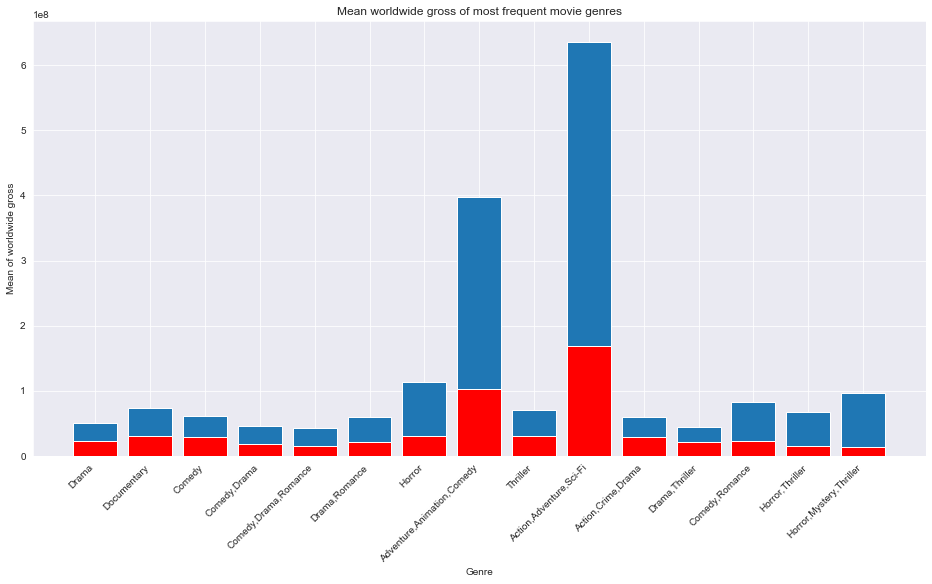

In [68]:
grossmean = merge1.groupby('genres').worldwide_gross.mean()
budgetmean = merge1.groupby('genres').production_budget.mean()
indices = merge1.genres.value_counts()[:15].index

mean_of_top_genres = grossmean[indices]
budgetmean = budgetmean[indices]

fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Mean worldwide gross of most frequent movie genres')
ax.set_ylabel('Mean of worldwide gross')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, mean_of_top_genres);
ax.bar(indices, budgetmean, color = 'r');

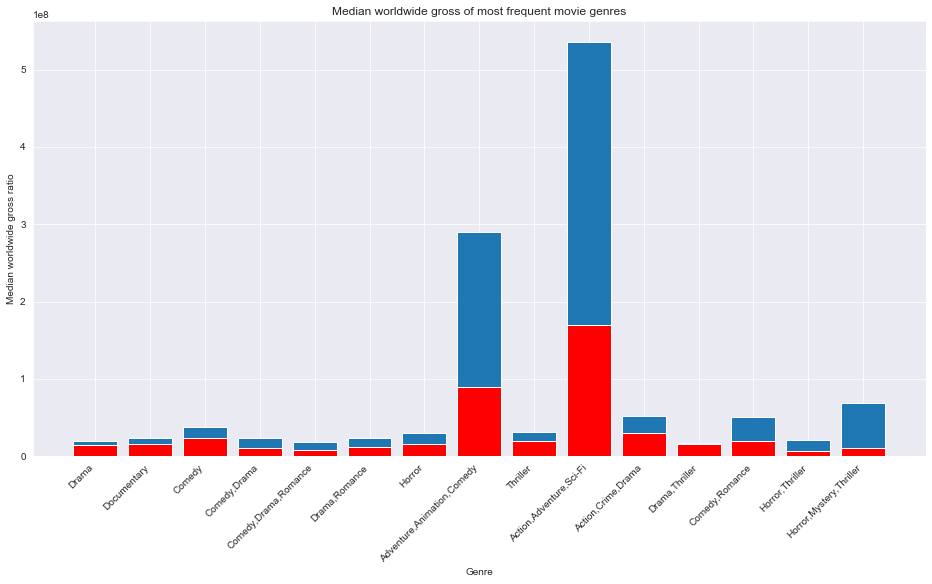

In [69]:
grossmedian = merge1.groupby('genres').worldwide_gross.median()
budgetmedian = merge1.groupby('genres').production_budget.median()
indices = merge1.genres.value_counts()[:15].index

median_of_top_genres = grossmedian[indices]
budgetmedian = budgetmedian[indices]

fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Median worldwide gross of most frequent movie genres')
ax.set_ylabel('Median worldwide gross ratio')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, median_of_top_genres);
ax.bar(indices, budgetmedian, color = 'r');

In [ ]:
grossstd = merge1.groupby('genres').worldwide_gross.std()
indices = merge1.genres.value_counts()[:15].index

std_of_top_genres = grossstd[indices]

fig, ax = plt.subplots(figsize = (16,8))
ax.set_title('Standard deviation of worldwide gross of most frequent movie genres')
ax.set_ylabel('Standard deviation of worldwide gross')
ax.set_xlabel('Genre')
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right')
ax.bar(indices, std_of_top_genres);